In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [2]:
uploaded=files.upload()

Saving _chineseMNIST.csv to _chineseMNIST.csv


In [3]:
def len_data(filename):
  i=0
  with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
                # print("Ignoring first line")
                first_line = False
            else:
              i+=1
  return i

In [14]:
def get_data(filename):
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        temp_train_images = []
        temp_train_labels = []
        temp_test_images = []
        temp_test_labels = []
        j = 0
        for row in csv_reader:
            if row[0] == "pixel_0":
              row = False
            elif j< leng * split_size:
              image_data = row[0:4096]
              image_data_as_array = np.array_split(image_data, 64)
              temp_train_images.append(image_data_as_array)
              if row[4096]=="100":
                temp_train_labels.append("11")
              elif row[4096]=="1000":
                temp_train_labels.append("12")
              elif row[4096]=="10000":
                temp_train_labels.append("13")
              elif row[4096]=="100000000":
                temp_train_labels.append("14")
              else:      
                temp_train_labels.append(row[4096])      
           
            else:              
              image_data = row[0:4096]
              image_data_as_array = np.array_split(image_data, 64)
              temp_test_images.append(image_data_as_array)
              if row[4096]=="100":
                temp_test_labels.append("11")
              elif row[4096]=="1000":
                temp_test_labels.append("12")
              elif row[4096]=="10000":
                temp_test_labels.append("13")
              elif row[4096]=="100000000":
                temp_test_labels.append("14")
              else: 
                temp_test_labels.append(row[4096])


            j+=1

        train_images = np.array(temp_train_images).astype('float')
        train_labels = np.array(temp_train_labels).astype('float')
        test_images = np.array(temp_test_images).astype('float')
        test_labels = np.array(temp_test_labels).astype('float')

    return  train_images, train_labels, test_images, test_labels


leng = len_data('_chineseMNIST.csv')
split_size = .8

training_images, training_labels, testing_images, testing_labels = get_data('_chineseMNIST.csv') 

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(12000, 64, 64)
(12000,)
(3000, 64, 64)
(3000,)


In [7]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    rescale=1. / 255)

print(training_images.shape)
print(testing_images.shape)

(12000, 64, 64, 1)
(3000, 64, 64, 1)


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(15, activation=tf.nn.softmax)])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=50,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)



Epoch 1/50
375/375 [==============================] - 109s 287ms/step - loss: 2.0167 - accuracy: 0.3040 - val_loss: 1.2510 - val_accuracy: 0.5323
Epoch 2/50
375/375 [==============================] - 107s 285ms/step - loss: 1.2662 - accuracy: 0.5573 - val_loss: 0.7345 - val_accuracy: 0.7297
Epoch 3/50
375/375 [==============================] - 107s 286ms/step - loss: 1.0442 - accuracy: 0.6337 - val_loss: 0.5769 - val_accuracy: 0.7957
Epoch 4/50
375/375 [==============================] - 109s 290ms/step - loss: 0.9028 - accuracy: 0.6883 - val_loss: 0.4495 - val_accuracy: 0.8483
Epoch 5/50
375/375 [==============================] - 108s 289ms/step - loss: 0.8149 - accuracy: 0.7217 - val_loss: 0.4456 - val_accuracy: 0.8270
Epoch 6/50
375/375 [==============================] - 108s 289ms/step - loss: 0.7353 - accuracy: 0.7416 - val_loss: 0.3558 - val_accuracy: 0.8657
Epoch 7/50
375/375 [==============================] - 109s 290ms/step - loss: 0.6625 - accuracy: 0.7757 - val_loss: 0.3271 -

In [13]:
model.summary()

#Model: "sequential_1"
#_________________________________________________________________
# Layer (type)                Output Shape              Param #   
#=================================================================
# conv2d_2 (Conv2D)           (None, 62, 62, 64)        640       
#                                                                 
# max_pooling2d_2 (MaxPooling  (None, 31, 31, 64)       0         
# 2D)                                                             
#                                                                 
# conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
#                                                                 
# max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
# 2D)                                                             
#                                                                 
# flatten_1 (Flatten)         (None, 12544)             0         
#                                                                 
# dense_2 (Dense)             (None, 128)               1605760   
#                                                                 
# dense_3 (Dense)             (None, 15)                1935      
#                                                                 
#=================================================================
#Total params: 1,645,263
#Trainable params: 1,645,263
#Non-trainable params: 0
#_________________________________________________________________

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [11]:
from google.colab import files

model.save('CNLrecognition_model.h5')
files.download('CNLrecognition_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

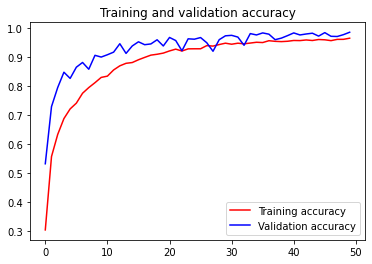

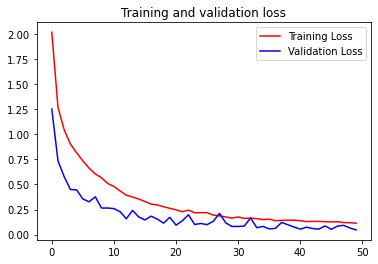

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()